# Classification and Clustering analysis of Breast cancer data
- Classification
- Clustering
- Source of the data: [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import csv
import io
import requests
import itertools
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from sklearn import cluster
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve, auc
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.cluster import MeanShift, KMeans 

### Reading the data from the repository url and split it the training and testing set

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
Attributes = ['id','Thickness','Cell Size','Cell Shape','Adhesion','Epithelial Cell Size', 'Bare Nuclei',
              'Chromatin','Nucleoli', 'Mitoses','Class'] 
s=requests.get(url).content
ccd=pd.read_csv(io.StringIO(s.decode('utf-8')),names=Attributes)
mask = ccd['Bare Nuclei'].str.contains('\?')
ccd = ccd[mask == False].apply(pd.to_numeric)
#ccd.to_csv('breast-cancer-wisconsin.csv')
patient_id = ccd["id"]
data  = ccd.loc[:,'Thickness':'Mitoses']
target = ccd["Class"]

X_train, X_test, y_train, y_test = train_test_split(data,  target, test_size=0.33, random_state=0)

### List of Classifier (supervised learning)
- Nearest Neighbors
- Linear Support Vector Classification
- Radial Basis Function SVM
- Gaussian Process Classifier
- Decision Tree Classifier
- Random Forest Classifier
- Multi-layer Perceptron classifier
- An AdaBoost classifier
- Gaussian Naive Bayes
- Logistic Regression classifier
- Quadratic Discriminant Analysis(QDA)

In [4]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "MLP", "AdaBoost",
         "Naive Bayes","Logistic Regression" ,"QDA"]
classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear",probability=True, C=1.0),
    SVC(gamma=2,probability=True, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1,max_iter = 500),
    AdaBoostClassifier(),
    GaussianNB(),
    linear_model.LogisticRegression(),
    QuadraticDiscriminantAnalysis()]

### Comparison of classifiers without standardization

In [5]:
    for name, clf in zip(names, classifiers):
        t0 = time.time()
        clf.fit(X_train, y_train)
        t1 = time.time()
        scores = cross_val_score(clf, data, target, cv=10)
        print("Accuracy of %s : %0.2f (+/- %0.2f). Time : %.3fs " % (name,scores.mean(),
                                                                             scores.std() * 2,
                                                                             (t1 - t0)))
      

Accuracy of Nearest Neighbors : 0.97 (+/- 0.05). Time : 0.051s 
Accuracy of Linear SVM : 0.97 (+/- 0.04). Time : 0.013s 
Accuracy of RBF SVM : 0.83 (+/- 0.11). Time : 0.038s 
Accuracy of Gaussian Process : 0.97 (+/- 0.05). Time : 2.225s 
Accuracy of Decision Tree : 0.95 (+/- 0.04). Time : 0.027s 
Accuracy of Random Forest : 0.96 (+/- 0.04). Time : 0.014s 
Accuracy of MLP : 0.96 (+/- 0.08). Time : 0.400s 
Accuracy of AdaBoost : 0.95 (+/- 0.06). Time : 0.070s 
Accuracy of Naive Bayes : 0.96 (+/- 0.04). Time : 0.001s 
Accuracy of Logistic Regression : 0.96 (+/- 0.06). Time : 0.020s 
Accuracy of QDA : 0.95 (+/- 0.06). Time : 0.066s 


### Comparison of classifiers with standardization

In [6]:
    for name, clf in zip(names, classifiers):
        t0 = time.time()
        clf = make_pipeline(StandardScaler(),clf)
        clf.fit(X_train, y_train)
        t1 = time.time()
        scores = cross_val_score(clf, data, target, cv=10)
        print("Accuracy of %s with Standardization : %0.2f (+/- %0.2f). Time : %.3fs " % (name,scores.mean(),
                                                                             scores.std() * 2,
                                                                             (t1 - t0)))
        

Accuracy of Nearest Neighbors with Standardization : 0.97 (+/- 0.05). Time : 0.002s 
Accuracy of Linear SVM with Standardization : 0.96 (+/- 0.04). Time : 0.008s 
Accuracy of RBF SVM with Standardization : 0.94 (+/- 0.07). Time : 0.030s 
Accuracy of Gaussian Process with Standardization : 0.97 (+/- 0.05). Time : 1.015s 
Accuracy of Decision Tree with Standardization : 0.95 (+/- 0.03). Time : 0.002s 
Accuracy of Random Forest with Standardization : 0.97 (+/- 0.04). Time : 0.015s 
Accuracy of MLP with Standardization : 0.97 (+/- 0.03). Time : 0.375s 
Accuracy of AdaBoost with Standardization : 0.95 (+/- 0.06). Time : 0.071s 
Accuracy of Naive Bayes with Standardization : 0.96 (+/- 0.04). Time : 0.001s 
Accuracy of Logistic Regression with Standardization : 0.97 (+/- 0.05). Time : 0.002s 
Accuracy of QDA with Standardization : 0.95 (+/- 0.06). Time : 0.001s 


### Check the balance of positive and negative classes

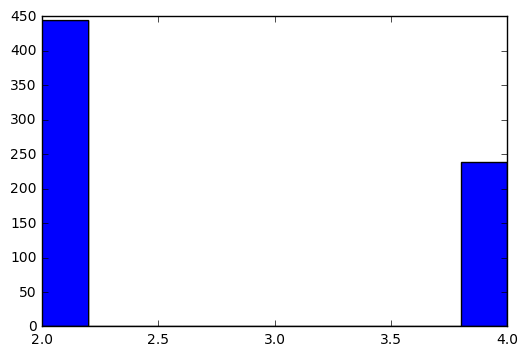

[ 444.    0.    0.    0.    0.    0.    0.    0.    0.  239.]


1.8577405857740585

In [7]:
(n, bins, patches) = plt.hist(target, label='hst')
plt.show()
print(n)
n[0]/n[-1]

### Receiver operating characteristic (ROC) curve analysis

In [8]:
y = label_binarize(target, classes=[2,4])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.5,
                                                    random_state=0)
random_state = np.random.RandomState(0)


In [9]:
fpr = dict()
tpr = dict()
roc_auc = dict()
i=0
for name, clf in zip(names, classifiers):
        clf = make_pipeline(StandardScaler(),clf)
        clf.fit(X_train, y_train.ravel())     
        preds = clf.predict_proba(X_test)[:,1]
        fpr[i], tpr[i], _ = roc_curve(y_test.ravel(), preds.ravel())
        roc_auc[i] = auc(fpr[i],tpr[i])
        i+= 1

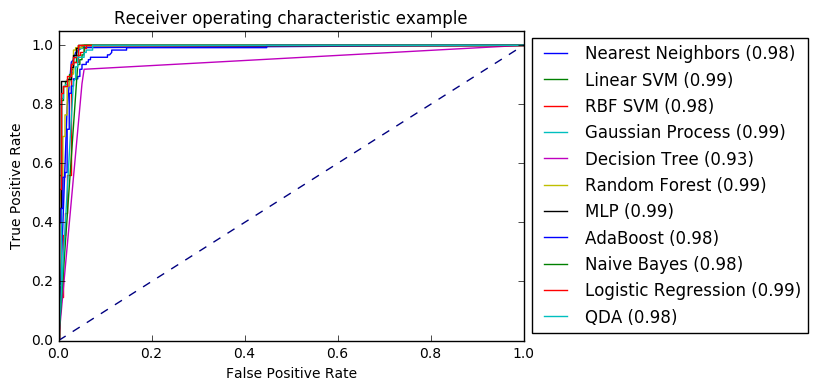

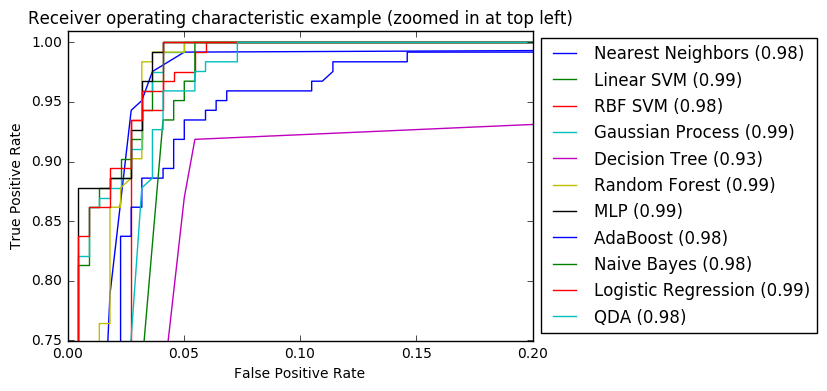

In [10]:
plt.figure(1)
lw = 1
for key, value in fpr.items():
    plt.plot(fpr[key], tpr[key],lw=lw, label='%s (%0.2f)' % (names[key] ,roc_auc[key]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(2)
lw = 1
for key, value in fpr.items():
    plt.plot(fpr[key], tpr[key],lw=lw, label='%s (%0.2f)' % (names[key] ,roc_auc[key]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 0.2])
plt.ylim([0.75, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example (zoomed in at top left)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

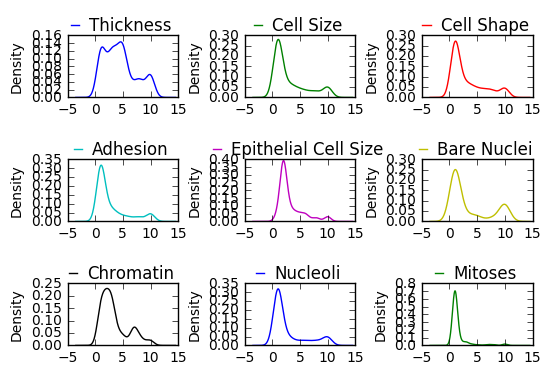

In [11]:
plt.figure(figsize=(15, 10))
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False,legend=True)
plt.subplots_adjust(wspace=0.6, hspace=1.0)
[ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.55),
          frameon=False,handlelength=0.1 ) for ax in plt.gcf().axes]
plt.show()

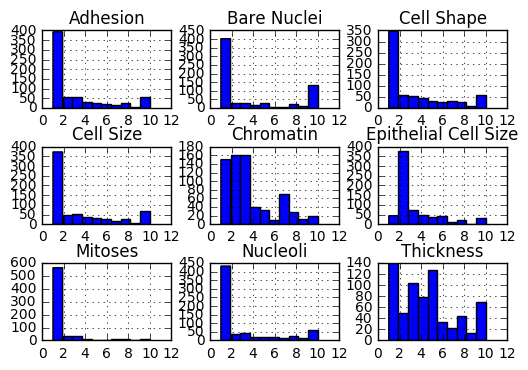

In [12]:
data.hist()
gs1 = gridspec.GridSpec(3, 3)
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

### Correlations between different features

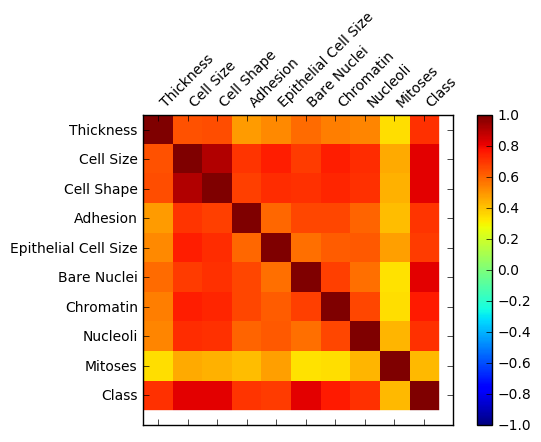

In [13]:
correlations = ccd.loc[:,'Thickness':'Class'].corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(Attributes[1::], rotation=45, ha='left')
ax.set_yticklabels(Attributes[1::])
plt.show()

## Clustering the data ignoring the class label

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
if sum(labels) > len(labels)/2 : labels = abs(labels-1)

[ 444.  239.]
[ 453.  230.]


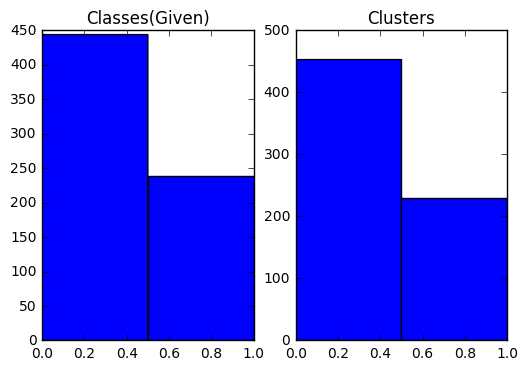

In [15]:
bi_target = (target-2)/2
f, (ax1, ax2) = plt.subplots(1, 2)
(nClass, bins, patches) = ax1.hist(bi_target, bins= 2,label='hst')
ax1.set_title('Classes(Given)')
(nClusters, bins, patches)= ax2.hist(labels, bins= 2,label='hst')
ax2.set_title('Clusters')
print(nClass)
print(nClusters)
plt.show()

## Confusion matrix of Clustering with KMeans

Confusion matrix, without normalization
[[435   9]
 [ 18 221]]
Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.08  0.92]]


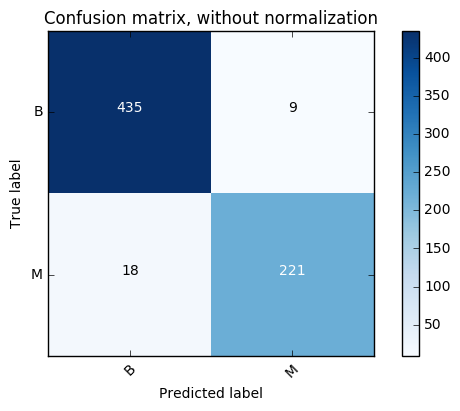

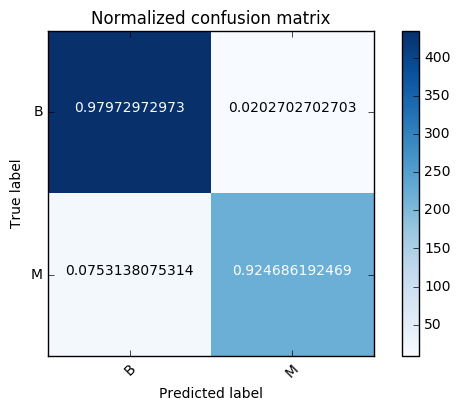

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names=["B", "M"]
# Compute confusion matrix
bi_target = (target-2)/2
cnf_matrix = confusion_matrix(bi_target, labels)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
class_names=['B', 'M']
class_names
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Comparison of different type Clustering
- Mini-Batch K-Means clustering
- SpectralClustering
- Agglomerative Clustering (Ward)
- AgglomerativeClustering (Average)
- Birch clustering

Confusion matrix, without normalization
[[436   8]
 [ 18 221]]
Confusion matrix, without normalization
[[431  13]
 [  4 235]]
Confusion matrix, without normalization
[[427  17]
 [  6 233]]
Confusion matrix, without normalization
[[444   0]
 [237   2]]
Confusion matrix, without normalization
[[423  21]
 [  1 238]]


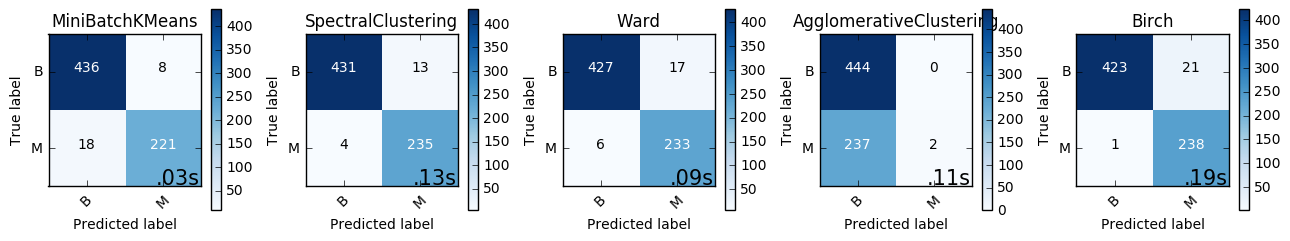

In [17]:
clustering_names = ['MiniBatchKMeans', 'SpectralClustering', 'Ward', 'AgglomerativeClustering',
     'Birch']
    # connectivity matrix for structured Ward
connectivity = kneighbors_graph(data, n_neighbors=10, include_self=False)
    # make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)
 # create clustering estimators
# ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
two_means = cluster.MiniBatchKMeans(n_clusters=2)
ward = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward',
                                           connectivity=connectivity)
spectral = cluster.SpectralClustering(n_clusters=2,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=.2)
affinity_propagation = cluster.AffinityPropagation(damping=.9,
                                                       preference=-200)

average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock", n_clusters=2,
        connectivity=connectivity)

birch = cluster.Birch(n_clusters=2)
clustering_algorithms = [two_means, spectral, ward, average_linkage,
        birch]
plot_num = 1
plt.figure(figsize=(len(clustering_names) * 2 + 3, 9.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)
for name, algorithm in zip(clustering_names, clustering_algorithms):
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(data)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)
        
        if sum(y_pred) > len(y_pred)/2 : y_pred = abs(y_pred-1)
        cnf_matrix = confusion_matrix(bi_target, y_pred)
        # plot
        plt.subplot(4, len(clustering_algorithms), plot_num)
        
        #plt.title(name, size=18)
        # Plot normalized confusion matrix
        #plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                              title=name)
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1
plt.show()